# Tugas 3

Nama : Bob Chrismansyah

NIM : H071201087

 ## Dataset Numerik

## Early stage diabetes risk prediction dataset. Data Set

### Source:

1. M M Faniqul Islam,
2. Rahatara Ferdousi,
3.Sadikur Rahman,
and Humayra
4.Yasmin Bushra

  * Queen Mary University of London, United Kingdom
m.islam '@' smd17.qmul.ac.uk
  * Metropolitan University Sylhet, Bangladesh
rahatara '@' metrouni.edu.bd
  * Metropolitan University Sylhet, Bangladesh
rahmansadik004 '@' gmail.com
  * Metropolitan University Sylhet, Bangladesh
humayrabushra234 '@' gmail.com

## Data Set Information:

This has been col-
lected using direct questionnaires from the patients of Sylhet Diabetes
Hospital in Sylhet, Bangladesh and approved by a doctor.

In [1]:
# import the library
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

Membaca Data

In [4]:
data = pd.read_csv("diabetes_data_upload.csv")



Menampilkan data secara kasar

In [6]:
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


Melihat atribut-atribut apa saja ada dengan menggunakan data frame coloumns

In [5]:
data.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')


melihat data dengan menampilkan 25 baris 

* Ketika kita hanya ingin melihat beberapa baris saja

In [7]:
data.head(25)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


Melihat apa-apa saja nilai yang unik. Biasanya data yang unik itu lebih baik dilihat pada data yang kategorik.

In [8]:
data.value_counts()

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  Polyphagia  Genital thrush  visual blurring  Itching  Irritability  delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  class   
30   Male    No        No          No                  No        No          No              No               No       No            No               No               No                No        No       Negative    16
38   Male    No        No          No                  No        No          No              No               No       No            No               No               No                No        No       Negative     7
53   Male    No        No          No                  Yes       Yes         No              Yes              Yes      No            Yes              Yes              Yes               Yes       No       Negative     7
46   Male    No        No          No                  Yes       No          No              No               Yes      No         

Mencari beberapa atribut

In [9]:
column_names = data.columns
column_names_class = column_names[4:]
column_names_class

Index(['sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
       'visual blurring', 'Itching', 'Irritability', 'delayed healing',
       'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [10]:
for i in column_names_class:
  print(data[i].value_counts())

No     303
Yes    217
Name: sudden weight loss, dtype: int64
Yes    305
No     215
Name: weakness, dtype: int64
No     283
Yes    237
Name: Polyphagia, dtype: int64
No     404
Yes    116
Name: Genital thrush, dtype: int64
No     287
Yes    233
Name: visual blurring, dtype: int64
No     267
Yes    253
Name: Itching, dtype: int64
No     394
Yes    126
Name: Irritability, dtype: int64
No     281
Yes    239
Name: delayed healing, dtype: int64
No     296
Yes    224
Name: partial paresis, dtype: int64
No     325
Yes    195
Name: muscle stiffness, dtype: int64
No     341
Yes    179
Name: Alopecia, dtype: int64
No     432
Yes     88
Name: Obesity, dtype: int64
Positive    320
Negative    200
Name: class, dtype: int64


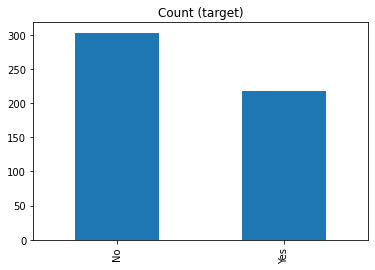

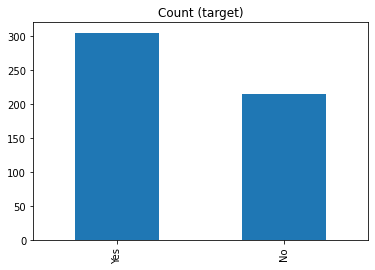

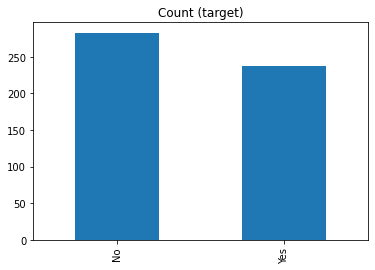

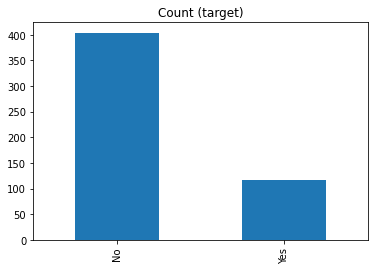

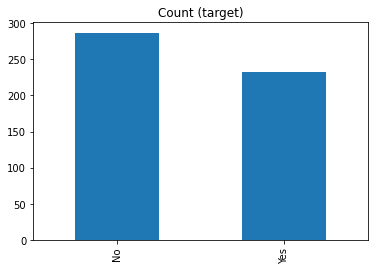

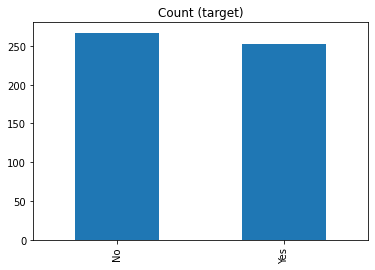

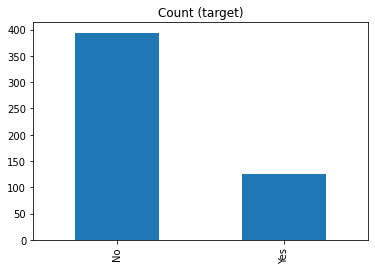

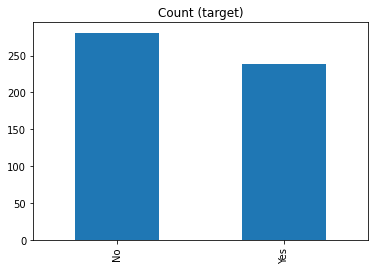

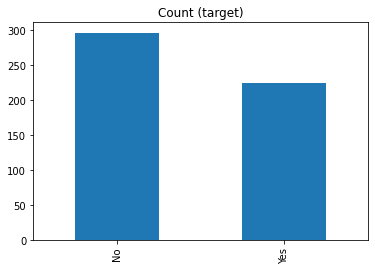

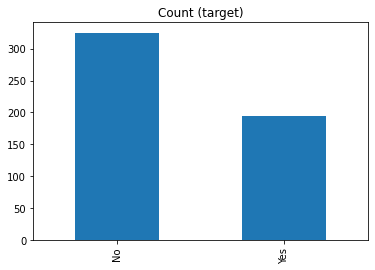

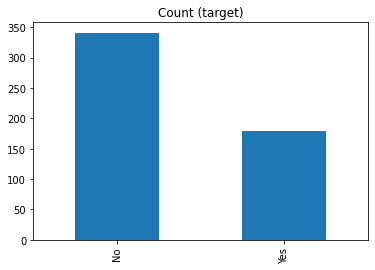

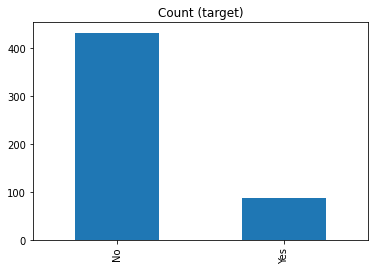

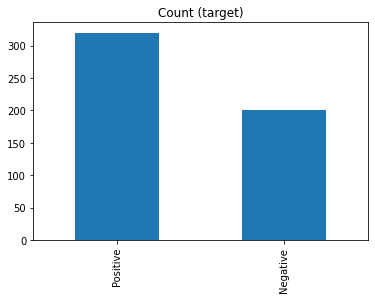

In [11]:
for i in column_names_class:
  data[i].value_counts().plot(kind='bar', title='Count (target)')
  plt.show()

Melihat informasi statistik dasar dari data dengan menggunakan method describe dari pandas

In [12]:
data.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Melihat apa saja tipe datanya

In [13]:
for i in column_names:
  print(f"{i} bertipe data {data[i].dtypes}")

Age bertipe data int64
Gender bertipe data object
Polyuria bertipe data object
Polydipsia bertipe data object
sudden weight loss bertipe data object
weakness bertipe data object
Polyphagia bertipe data object
Genital thrush bertipe data object
visual blurring bertipe data object
Itching bertipe data object
Irritability bertipe data object
delayed healing bertipe data object
partial paresis bertipe data object
muscle stiffness bertipe data object
Alopecia bertipe data object
Obesity bertipe data object
class bertipe data object


## **Handle Missing Value**

In [15]:
data["Age"].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
515    False
516    False
517    False
518    False
519    False
Name: Age, Length: 520, dtype: bool

Sum digunakan untuk menjumlahkan berapa missing value yang ada pada setiap variabel, atribut atau kolom

In [16]:
data.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [20]:
data.values

array([[40, 'Male', 'No', ..., 'Yes', 'Yes', 'Positive'],
       [58, 'Male', 'No', ..., 'Yes', 'No', 'Positive'],
       [41, 'Male', 'Yes', ..., 'Yes', 'No', 'Positive'],
       ...,
       [58, 'Female', 'Yes', ..., 'No', 'Yes', 'Positive'],
       [32, 'Female', 'No', ..., 'Yes', 'No', 'Negative'],
       [42, 'Male', 'No', ..., 'No', 'No', 'Negative']], dtype=object)

In [17]:
data.shape

(520, 17)

In [32]:
data["Gender"].value_counts()

Male      328
Female    192
Name: Gender, dtype: int64

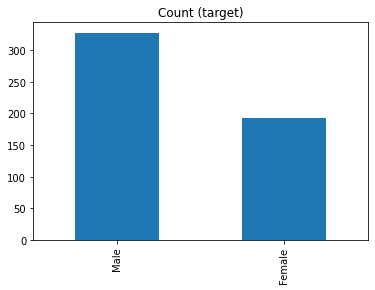

In [33]:
data["Gender"].value_counts().plot(kind='bar', title='Count (target)')

## **Categorical encoding using Label-Encoding and One-Hot-Encoder**

1. One Hot Encoding

    One-Hot encoding adalah salah satu metode encoding. Metode ini merepresentasikan data bertipe kategori sebagai vektor biner yang bernilai integer, 0 dan 1, dimana semua elemen akan bernilai 0 kecuali satu elemen yang bernilai 1, yaitu elemen yang memiliki nilai kategori tersebut

In [34]:
one_hot_encoded = pd.get_dummies(data, columns = ["Age"])
print(one_hot_encoded)

     Gender Polyuria Polydipsia  ... Age_79 Age_85 Age_90
0      Male       No        Yes  ...      0      0      0
1      Male       No         No  ...      0      0      0
2      Male      Yes         No  ...      0      0      0
3      Male       No         No  ...      0      0      0
4      Male      Yes        Yes  ...      0      0      0
..      ...      ...        ...  ...    ...    ...    ...
515  Female      Yes        Yes  ...      0      0      0
516  Female      Yes        Yes  ...      0      0      0
517  Female      Yes        Yes  ...      0      0      0
518  Female       No         No  ...      0      0      0
519    Male       No         No  ...      0      0      0

[520 rows x 67 columns]


In [35]:
one_hot_encoded = pd.get_dummies(data, columns = ["Gender"])
print(one_hot_encoded)

     Age Polyuria Polydipsia  ...     class Gender_Female Gender_Male
0     40       No        Yes  ...  Positive             0           1
1     58       No         No  ...  Positive             0           1
2     41      Yes         No  ...  Positive             0           1
3     45       No         No  ...  Positive             0           1
4     60      Yes        Yes  ...  Positive             0           1
..   ...      ...        ...  ...       ...           ...         ...
515   39      Yes        Yes  ...  Positive             1           0
516   48      Yes        Yes  ...  Positive             1           0
517   58      Yes        Yes  ...  Positive             1           0
518   32       No         No  ...  Negative             1           0
519   42       No         No  ...  Negative             0           1

[520 rows x 18 columns]


### Label Encoding

In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
encoder = LabelEncoder()

Merubah nilai kategotik dari kolom Age ke numerik

In [38]:
data['Age'] = encoder.fit_transform(data['Age'])
data

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,34,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,17,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,21,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,36,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,15,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,24,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,34,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,8,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


## **Normalization**

  Normalisasi adalah proses pengelompokan atribut data yang membentuk entitas sederhana, nonredundan, fleksibel, dan mudah beradaptasi, Sehingga dapat dipastikan bahwa database yang dibuat berkualitas baik.

  Tujaun dari normalisasi itu dugunakan untuk menghilangkan dan mengurangi adanya redudansi data dan untuk memastikan dependensi data.adalah

*  Z-Score

In [ ]:
from sklearn.preprocessing import StandardScaler

# create a scaler object
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
data_std = pd.DataFrame(std_scaler.fit_transform(data), columns=data.columns)

data_std

* Min-max Scaler

In [40]:
print('Min : ', data.min(axis=0))
print('Max : ', data.max(axis=0))

Min :  Age                          0
Gender                  Female
Polyuria                    No
Polydipsia                  No
sudden weight loss          No
weakness                    No
Polyphagia                  No
Genital thrush              No
visual blurring             No
Itching                     No
Irritability                No
delayed healing             No
partial paresis             No
muscle stiffness            No
Alopecia                    No
Obesity                     No
class                 Negative
dtype: object
Max :  Age                         50
Gender                    Male
Polyuria                   Yes
Polydipsia                 Yes
sudden weight loss         Yes
weakness                   Yes
Polyphagia                 Yes
Genital thrush             Yes
visual blurring            Yes
Itching                    Yes
Irritability               Yes
delayed healing            Yes
partial paresis            Yes
muscle stiffness           Yes
Alopecia   

## **How to Detect, Handle and Visualize Outliers**

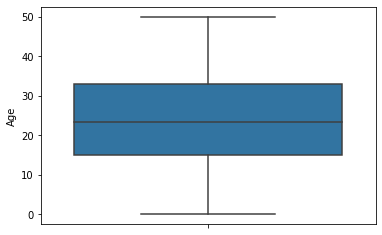

In [44]:
import seaborn as sns
sns.boxplot(y=data['Age'])

In [45]:
data = pd.concat([data, data], axis = 1)
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,16,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,34,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,34,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,17,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,17,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,21,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,21,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,36,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,36,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
